TASK 1

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df = pd.read_csv("Play Store Data.csv")
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
# Remove $ sign
df['Price'] = df['Price'].str.replace('$', '', regex=False)

# Remove rows where Price is not a number (i.e., contains wrong string like 'Everyone')
df = df[df['Price'].str.replace('.', '', 1).str.isnumeric()]

# Now convert safely
df['Price'] = df['Price'].astype(float)


In [22]:
df = df.dropna(subset=['Installs', 'Price'])

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '', regex=False)
df = df[df['Installs'].str.isnumeric()]  # Remove junk rows
df['Installs'] = df['Installs'].astype(int)


In [24]:
df['Revenue'] = df['Installs'] * df['Price']


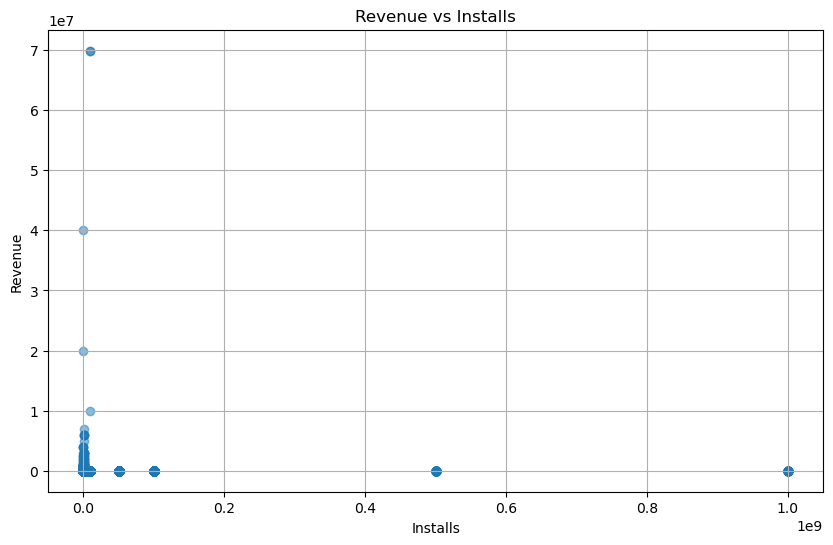

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df['Installs'], df['Revenue'], alpha=0.5)
plt.xlabel('Installs')
plt.ylabel('Revenue')
plt.title('Revenue vs Installs')
plt.grid(True)
plt.show()


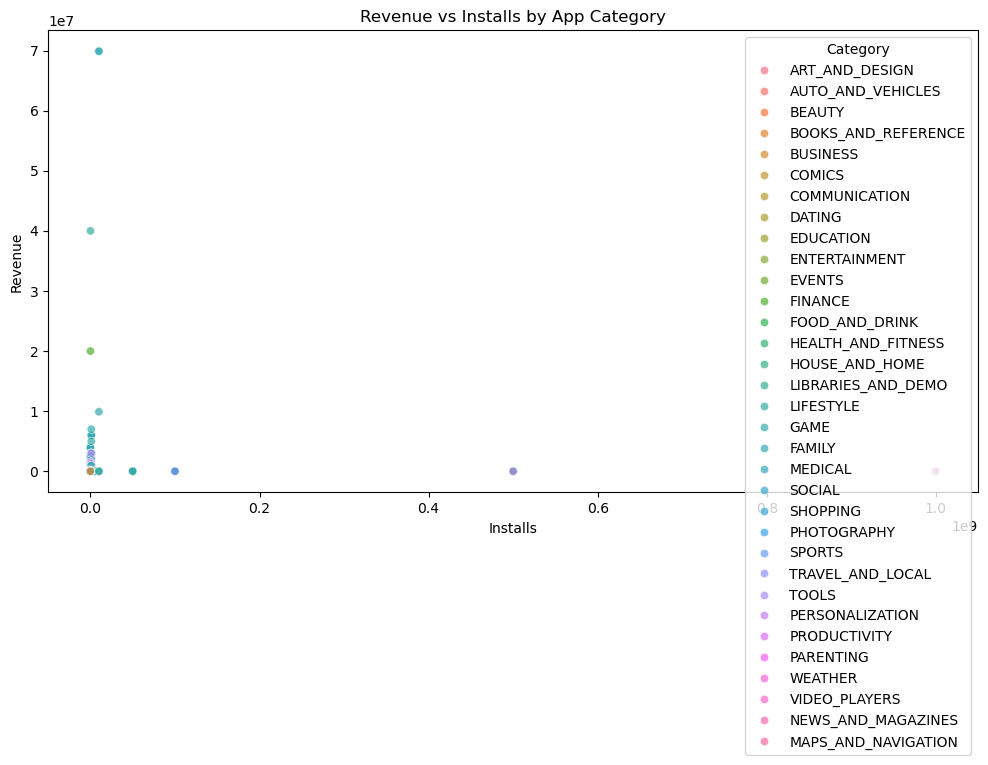

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Installs', y='Revenue', hue='Category', alpha=0.7)
plt.title('Revenue vs Installs by App Category')
plt.show()


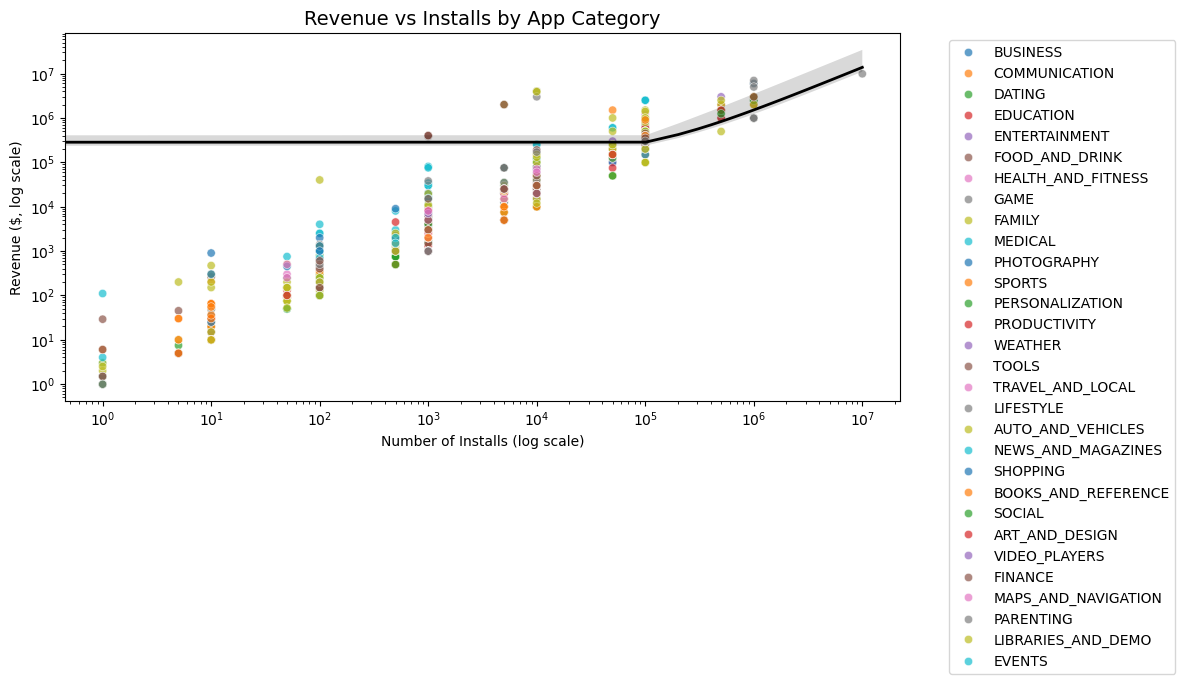

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out extreme outliers
paid_apps = paid_apps[(paid_apps['Revenue'] < 1e7) & (paid_apps['Installs'] < 1e8)]

# Log scale for better spread
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    hue='Category',
    palette='tab10',
    alpha=0.7
)
plt.xscale('log')
plt.yscale('log')

# Add trendline
sns.regplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    scatter=False,
    color='black',
    line_kws={'linewidth': 2, 'label': 'Trendline'}
)

plt.title('Revenue vs Installs by App Category', fontsize=14)
plt.xlabel('Number of Installs (log scale)')
plt.ylabel('Revenue ($, log scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
